# Subject: Classical Data Analysis

## Session 4 - Working with Geopandas and ArcGIS Online

### Demo 1 -  Mapping tools in Geopandas

Installing GeoPandas

To install the released version, you can use pip:

http://geopandas.org/install.html

pip install geopandas

or you can install the conda package from the conda-forge channel:

conda install -c conda-forge geopandas

Dependencies

Installation via conda should also install all dependencies, but a complete list is as follows:

- numpy
- pandas (version 0.15.2 or later)
- shapely
- fiona
- six
- pyproj

In [23]:
import pandas as pd
import geopandas as gpd
%matplotlib inline

In [24]:
from shapely.geometry import shape,Point,Polygon,mapping

## 1. Mapping Tools

Geopandas provides a high-level interface to the matplotlib library for making maps. Mapping shapes is as easy as using the plot() method on a GeoSeries or GeoDataFrame.
A GeoSeries is essentially a vector where each entry in the vector is a set of shapes corresponding to one observation. An entry may consist of only one shape (like a single polygon) or multiple shapes that are meant to be thought of as one observation (like the many polygons that make up the State of Hawaii or a country like Indonesia).

Geopandas has three basic classes of geometric objects (which are actually shapely objects):

Points / Multi-Points
Lines / Multi-Lines
Polygons / Multi-Polygons

A GeoDataFrame is a tabular data structure that contains a GeoSeries.

The most important property of a GeoDataFrame is that it always has one GeoSeries column that holds a special status. This GeoSeries is referred to as the GeoDataFrame’s “geometry”. When a spatial method is applied to a GeoDataFrame (or a spatial attribute like area is called), this commands will always act on the “geometry” column.

In [25]:
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

In [26]:
cities = gpd.read_file(gpd.datasets.get_path('naturalearth_cities'))

We can now plot those GeoDataFrames:

In [27]:
# Examine country GeoDataFrame
world.head()

,pop_est,continent,name,iso_a3,gdp_md_est,geometry
0,28400000.0,Asia,Afghanistan,AFG,22270.0,"POLYGON ((61.21081709172574 35.65007233330923,..."
1,12799293.0,Africa,Angola,AGO,110300.0,(POLYGON ((16.32652835456705 -5.87747039146621...
2,3639453.0,Europe,Albania,ALB,21810.0,"POLYGON ((20.59024743010491 41.85540416113361,..."
3,4798491.0,Asia,United Arab Emirates,ARE,184300.0,"POLYGON ((51.57951867046327 24.24549713795111,..."
4,40913584.0,South America,Argentina,ARG,573900.0,(POLYGON ((-65.50000000000003 -55.199999999999...


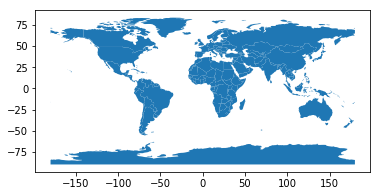

In [28]:
# Basic plot, random colors
world.plot()

In [39]:
# Examine cities GeoDataFrame
cities.head()

,name,geometry
0,Vatican City,POINT (12.45338654497177 41.90328217996012)
1,San Marino,POINT (12.44177015780014 43.936095834768)
2,Vaduz,POINT (9.516669472907267 47.13372377429357)
3,Luxembourg,POINT (6.130002806227083 49.61166037912108)
4,Palikir,POINT (158.1499743237623 6.916643696007725)


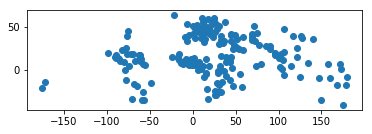

In [40]:
# Basic plot, random colors
cities.plot()

## 2. Chloropleth Maps

Geopandas makes it easy to create Chloropleth maps (maps where the color of each shape is based on the value of an associated variable). Simply use the plot command with the column argument set to the column whose values you want used to assign colors.

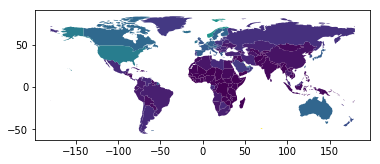

In [29]:
# Plot by GDP per capta
world = world[(world.pop_est>0) & (world.name!="Antarctica")]

world['gdp_per_cap'] = world.gdp_md_est / world.pop_est

world.plot(column='gdp_per_cap')

## 3. Choosing colors

One can also modify the colors used by plot with the cmap option (for a full list of colormaps, see the matplotlib website - http://matplotlib.org/users/colormaps.html):

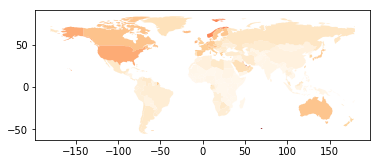

In [30]:
world.plot(column='gdp_per_cap', cmap='OrRd')

The way color maps are scaled can also be manipulated with the scheme option (if you have pysal installed, which can be accomplished via conda install pysal). By default, scheme is set to ‘equal_intervals’, but it can also be adjusted to any other pysal option, like ‘quantiles’, ‘percentiles’, etc.

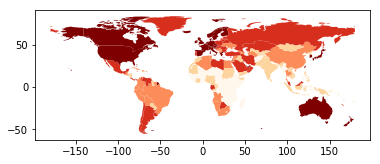

In [31]:
world.plot(column='gdp_per_cap', cmap='OrRd', scheme='quantiles')

## 4. Maps with Layers

There are two strategies for making a map with multiple layers – one more succinct, and one that is a littel more flexible.

Before combining maps, however, remember to always ensure they share a common CRS (so they will align).

In [32]:
world.crs

{'init': 'epsg:4326'}

In [36]:
cities.crs

{'init': 'epsg:4326'}

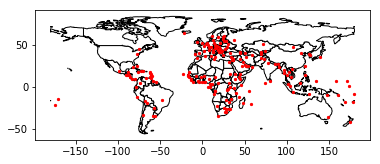

In [19]:
base = world.plot(color='white', edgecolor='black')

cities.plot(ax=base, marker='o', color='red', markersize=5)